In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

# CNN Example

In [9]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root="../Pre-processing/Curated_Dataset", transform=transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
num_classes = len(dataset.classes)

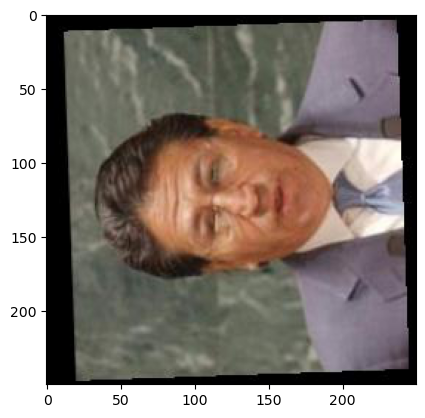

In [10]:
plt.imshow(dataset[0][0].T)

In [11]:
# images are (250, 250, 3)
# (((W - K + 2P)/S) + 1)
#         Here W = Input size
#         K = Filter size
#         S = Stride
#         P = Padding 

import torchvision.models as models

vgg16 = models.vgg16(pretrained=False)
vgg16.classifier[6] = nn.Linear(4096, num_classes)
vgg16 = vgg16.to(device)

criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(vgg16.parameters(), lr=0.0001) 


c:\Users\46737\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\46737\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [12]:
num_epochs = 30

for epoch in range(num_epochs):
    vgg16.train()  # Set the model to training mode
    
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Zero the gradients
        
        outputs = vgg16(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        
        loss.backward()  # Backward pass (calculate gradients)
        optimizer.step()  # Update weights
        
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    
    # Validate the model
    vgg16.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = vgg16(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss /= len(val_loader.dataset)
    accuracy = correct / total
    print(f"Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")


c:\Users\46737\anaconda3\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch [1/30], Loss: 3.7392
Validation Loss: 3.7382, Accuracy: 0.0127
Epoch [2/30], Loss: 3.7360
Validation Loss: 3.7392, Accuracy: 0.0200
Epoch [3/30], Loss: 3.7352
Validation Loss: 3.7409, Accuracy: 0.0127
Epoch [4/30], Loss: 3.7282
Validation Loss: 3.7365, Accuracy: 0.0109
Epoch [5/30], Loss: 3.7088
Validation Loss: 3.7517, Accuracy: 0.0236
Epoch [6/30], Loss: 3.7024
Validation Loss: 3.7506, Accuracy: 0.0255
Epoch [7/30], Loss: 3.6090
Validation Loss: 3.4946, Accuracy: 0.0564
Epoch [8/30], Loss: 3.1086
Validation Loss: 2.9114, Accuracy: 0.1709
Epoch [9/30], Loss: 2.4948
Validation Loss: 2.4203, Accuracy: 0.2982
Epoch [10/30], Loss: 1.9729
Validation Loss: 1.9597, Accuracy: 0.4436
Epoch [11/30], Loss: 1.4637
Validation Loss: 1.7413, Accuracy: 0.5036
Epoch [12/30], Loss: 0.9549
Validation Loss: 1.5670, Accuracy: 0.5527
Epoch [13/30], Loss: 0.5440
Validation Loss: 1.5084, Accuracy: 0.6073
Epoch [14/30], Loss: 0.2926
Validation Loss: 1.5339, Accuracy: 0.6364
Epoch [15/30], Loss: 0.2014
V

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
data = pd.read_csv('../Pre-processing/dataset/anchor_points_dataset/pairwise_data_points.csv')


X = data.drop(columns=['label']).to_numpy()
y = data['label'].to_numpy()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

input_size = X_train.shape[1]
num_classes = len(label_encoder.classes_)
data['label'].value_counts()

label
Lleyton_Hewitt               70
Jennifer_Capriati            70
Serena_Williams              65
Jacques_Chirac               65
Gloria_Macapagal_Arroyo      65
Jean_Chretien                64
Tom_Ridge                    64
Andre_Agassi                 63
Donald_Rumsfeld              63
Vladimir_Putin               62
Tony_Blair                   62
Nestor_Kirchner              61
Junichiro_Koizumi            61
Hugo_Chavez                  61
David_Beckham                61
Ariel_Sharon                 60
Luiz_Inacio_Lula_da_Silva    59
Guillermo_Coria              58
Gerhard_Schroeder            58
Laura_Bush                   58
Kofi_Annan                   57
Arnold_Schwarzenegger        57
Colin_Powell                 56
John_Ashcroft                56
Alvaro_Uribe                 56
Juan_Carlos_Ferrero          55
Roh_Moo-hyun                 55
Silvio_Berlusconi            54
Jack_Straw                   54
Vicente_Fox                  53
Alejandro_Toledo             52
Ge

#### MetricNet 

In [ ]:
from metricNet import MetricNet

model = MetricNet(input_size=input_size, num_classes=(True,num_classes))

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 10000
batch_size = 500
 
for epoch in range(n_epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        Xbatch = X_train_tensor[i:i+batch_size]
        ybatch = y_train_tensor[i:i+batch_size]

        y_pred = model(Xbatch)
        loss = criterion(y_pred, ybatch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        _, val_pred = torch.max(val_outputs, 1)
        val_accuracy = accuracy_score(y_test_tensor.numpy(), val_pred.numpy())
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")
